<a href="https://www.kaggle.com/code/mohamedmustafashaban/breast-cancer-anlaysis-and-machine-lraening?scriptVersionId=214503712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# # ***Dataset Description:***
***Breast cancer is the most prevalent cancer among women globally, accounting for 25% of all cancer cases. In 2015 alone, it impacted over 2.1 million individuals. The disease begins when cells in the breast grow uncontrollably, forming tumors that can be detected via X-ray or felt as lumps.***

***The primary challenge in its detection is classifying tumors as malignant (cancerous) or benign (non-cancerous). We invite you to analyze and classify these tumors using machine learning techniques, specifically Support Vector Machines (SVMs), with the Breast Cancer Wisconsin (Diagnostic) Dataset.***

# ***import Library***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from warnings import filterwarnings
filterwarnings('ignore')
sns.set()
%matplotlib inline


# ***Reading the Data***

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')


# ***EDA***


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# ***Data Preprocessing***

In [6]:
# Data Preprocessing
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# ***Plotting the distribution of diagnosis***

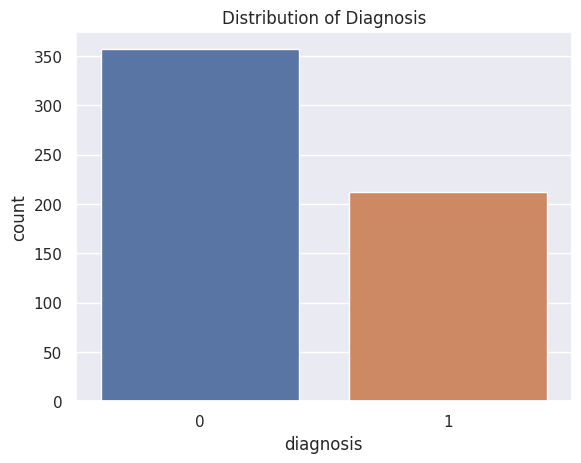

In [7]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

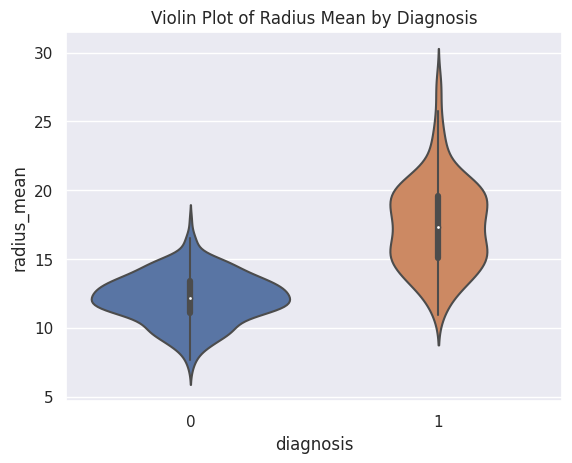

In [8]:
sns.violinplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()

In [9]:
X = df[['radius_mean', 'texture_mean']]
Y = df['diagnosis']
X1 = np.linspace(X['radius_mean'].min(), X['radius_mean'].max(), 100)
X2 = np.linspace(X['texture_mean'].min(), X['texture_mean'].max(), 100)
X1, X2 = np.meshgrid(X1, X2)
Z = np.random.rand(*X1.shape)

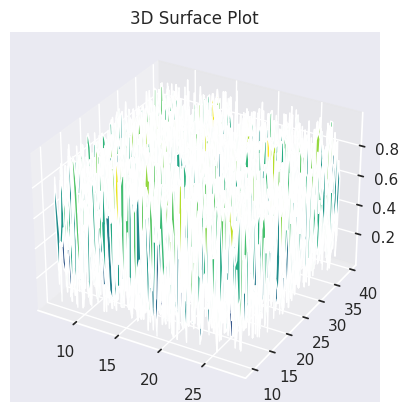

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
plt.title('3D Surface Plot')
plt.show()

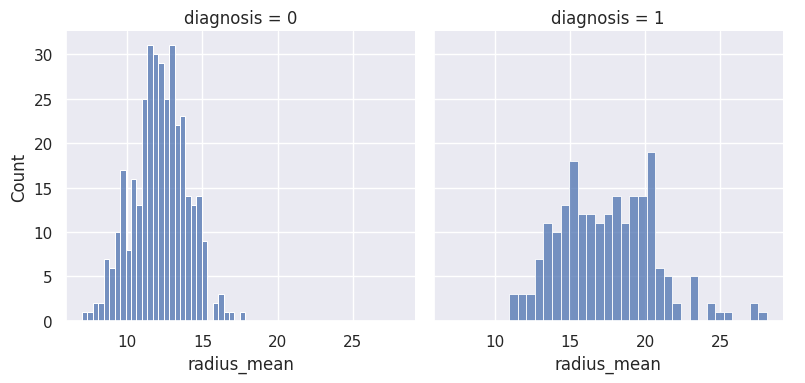

In [11]:
g = sns.FacetGrid(df, col="diagnosis", height=4)
g.map(sns.histplot, "radius_mean", bins=30)
g.add_legend()
plt.show()

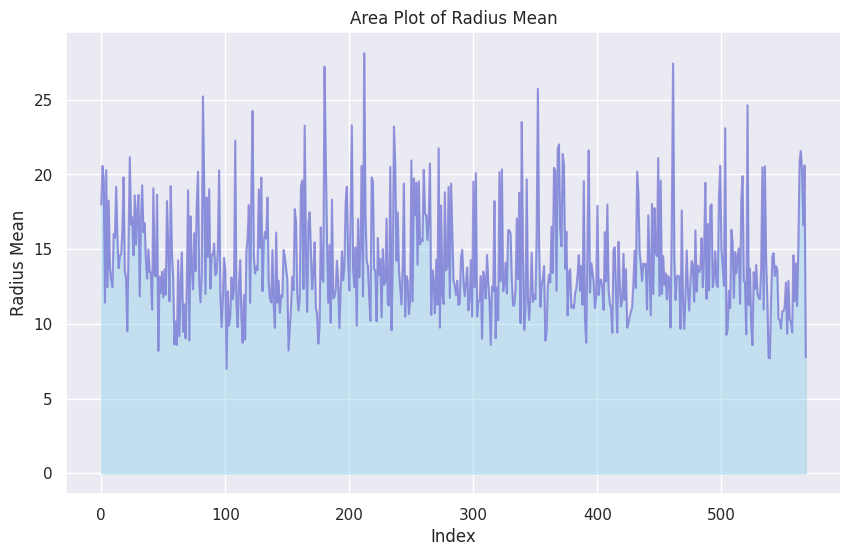

In [12]:
plt.figure(figsize=(10, 6))
plt.fill_between(df.index, df['radius_mean'], color='skyblue', alpha=0.4)
plt.plot(df['radius_mean'], color='Slateblue', alpha=0.6)
plt.title('Area Plot of Radius Mean')
plt.xlabel('Index')
plt.ylabel('Radius Mean')
plt.show()

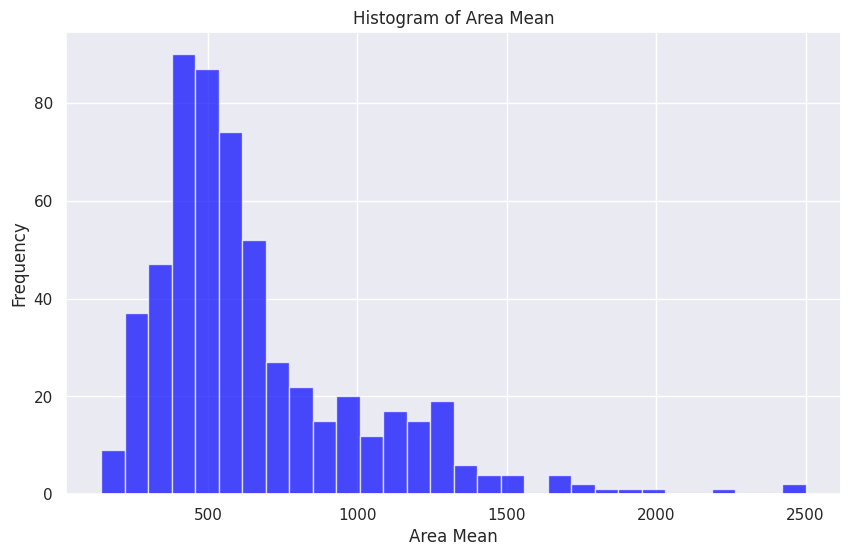

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['area_mean'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Area Mean')
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.show()

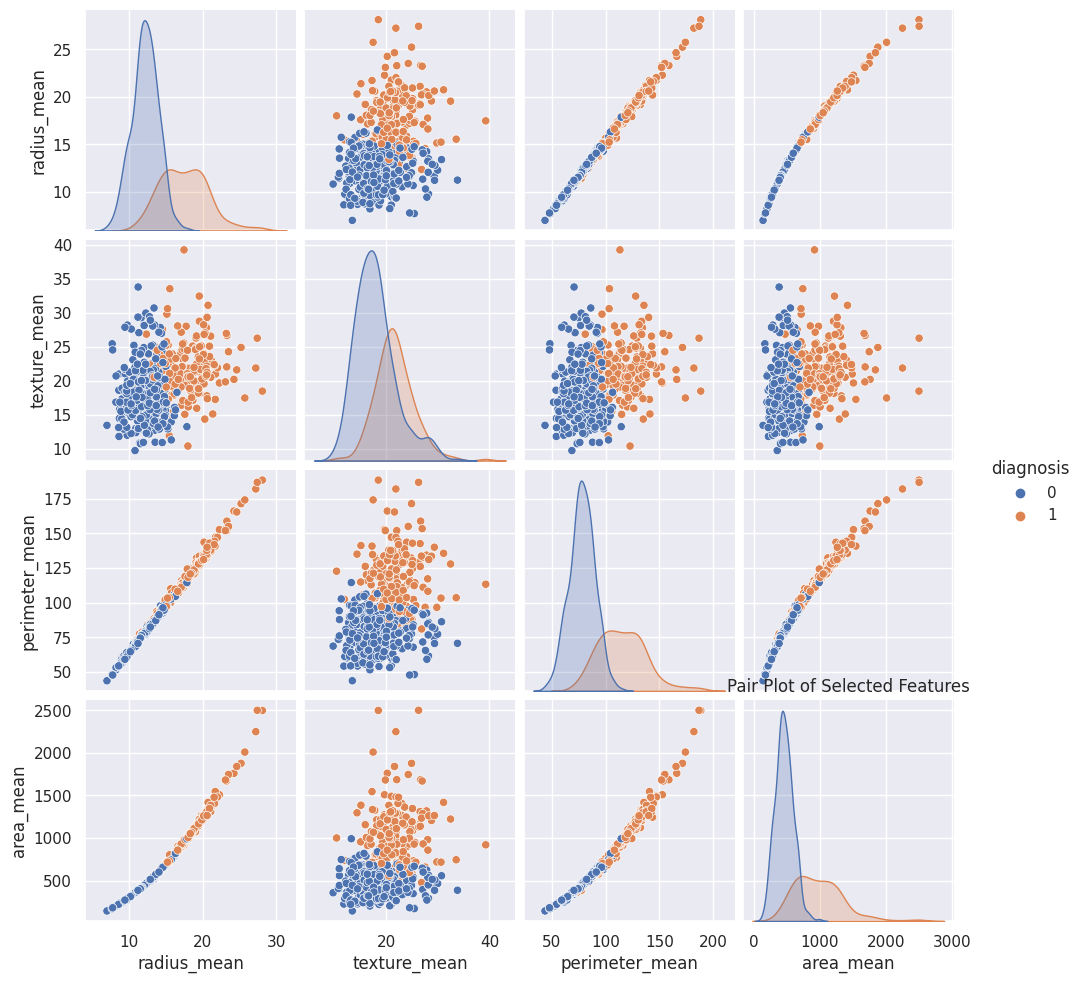

In [14]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.title('Pair Plot of Selected Features')
plt.show()

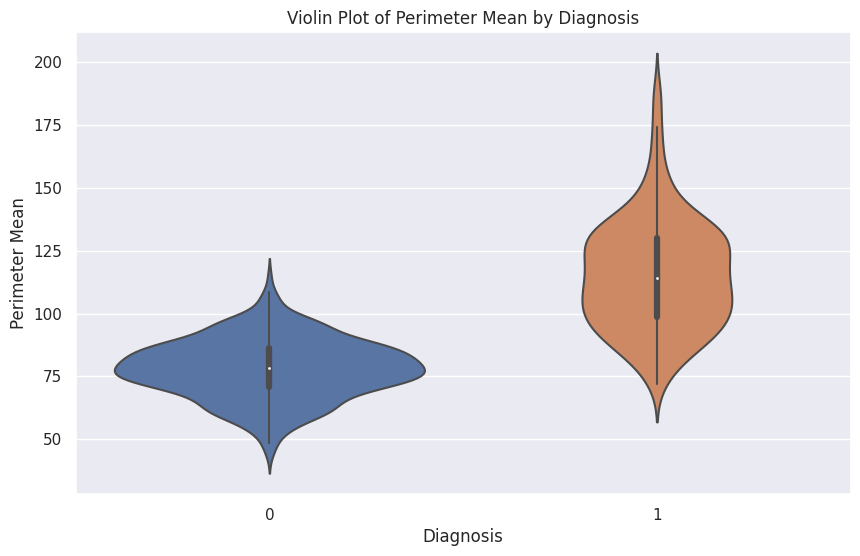

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='perimeter_mean', data=df)
plt.title('Violin Plot of Perimeter Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Perimeter Mean')
plt.show()

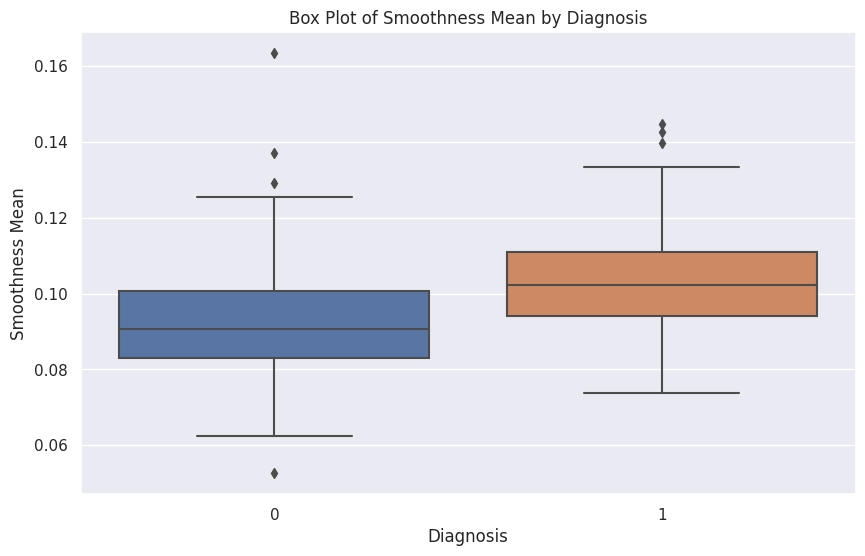

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df)
plt.title('Box Plot of Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')
plt.show()

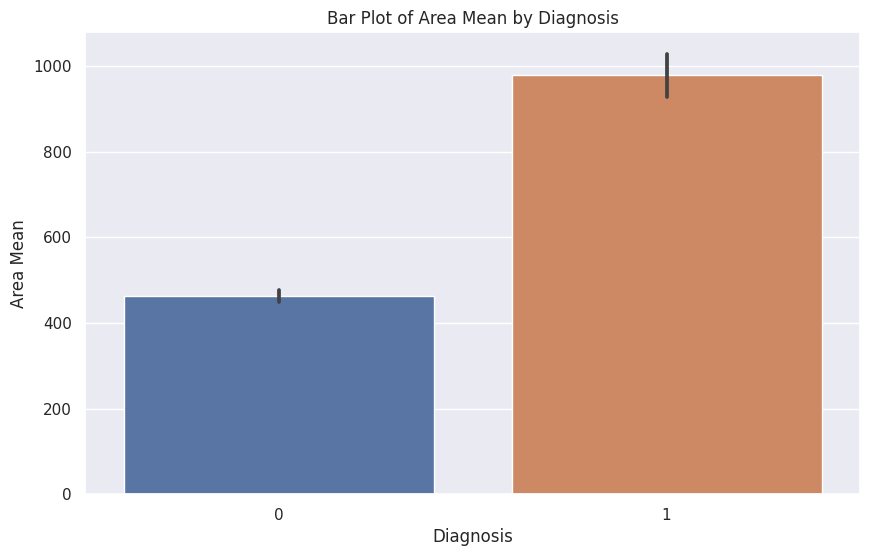

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis', y='area_mean', data=df)
plt.title('Bar Plot of Area Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.show()

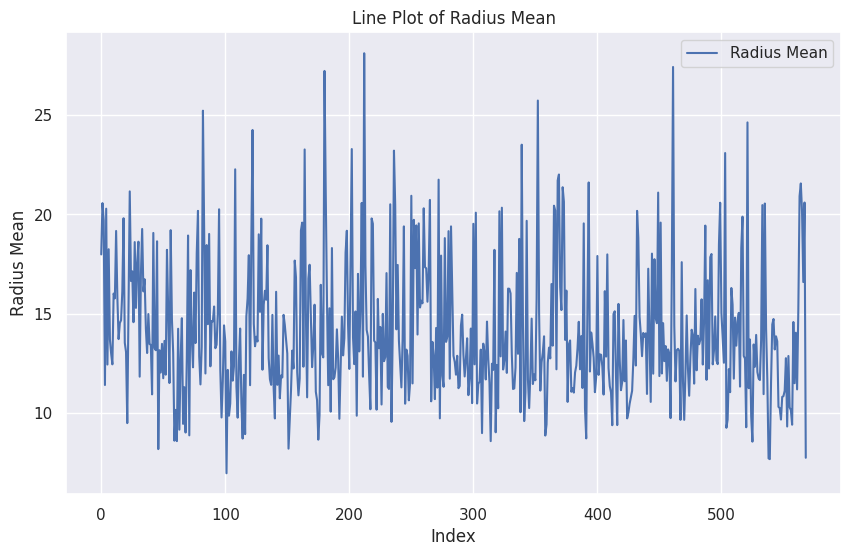

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['radius_mean'], label='Radius Mean')
plt.title('Line Plot of Radius Mean')
plt.xlabel('Index')
plt.ylabel('Radius Mean')
plt.legend()
plt.show()

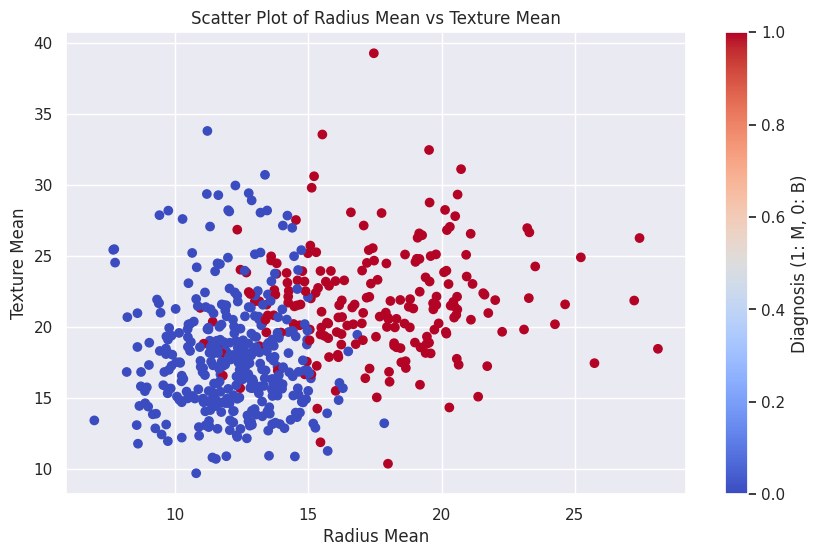

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'], cmap='coolwarm')
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.colorbar(label='Diagnosis (1: M, 0: B)')
plt.show()

# ***Splitting the Data:***
***Split the data into a training set (80%) and a testing set (20%).***

In [20]:
# Splitting the data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***modeling***

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



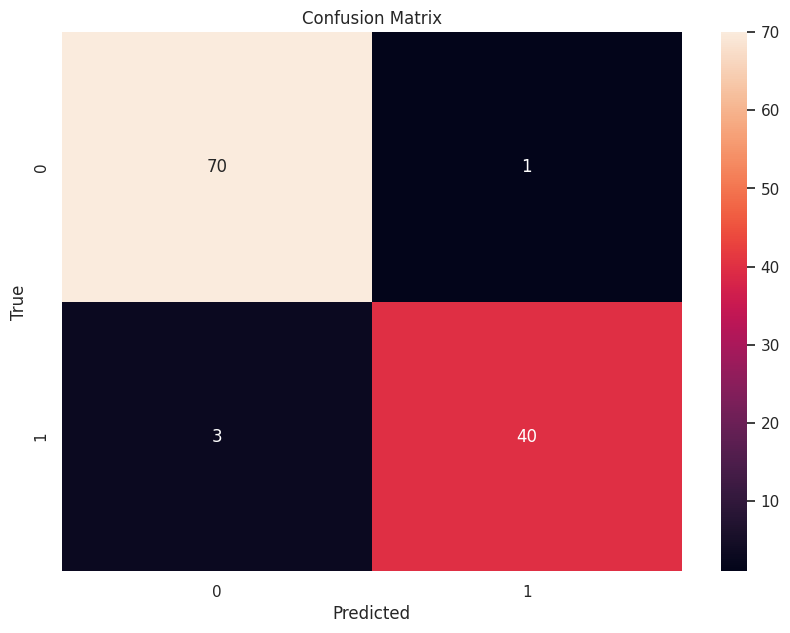

In [23]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


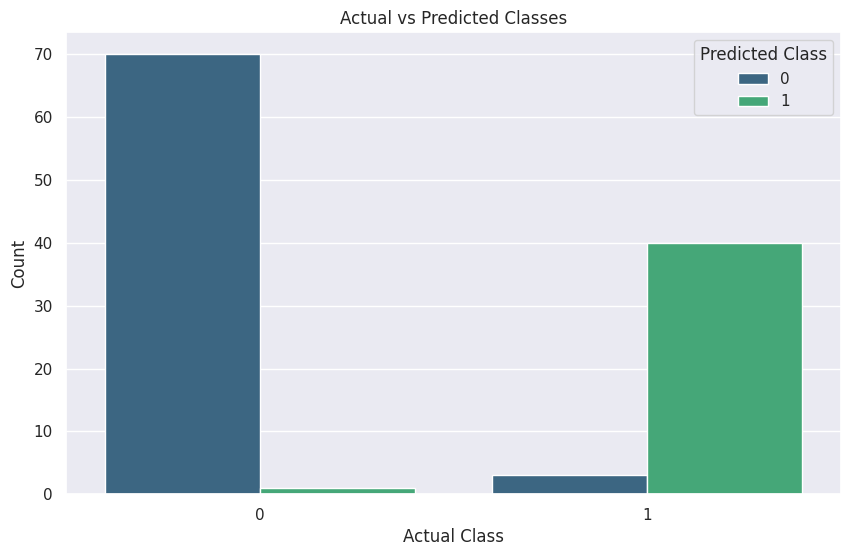

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_dt = dt_model.predict(X_test)

print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.9298245614035088


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



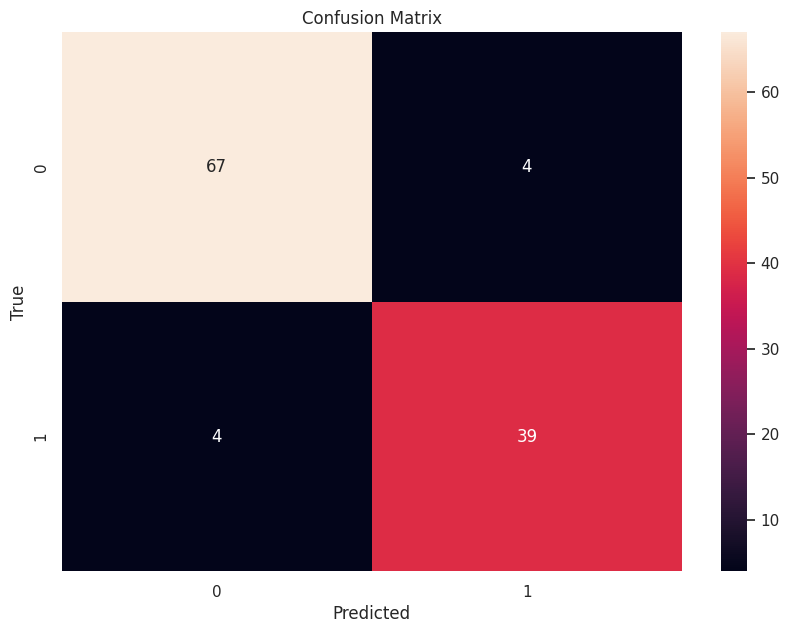

In [28]:
print(classification_report(y_test, y_pred_dt))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
esults_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


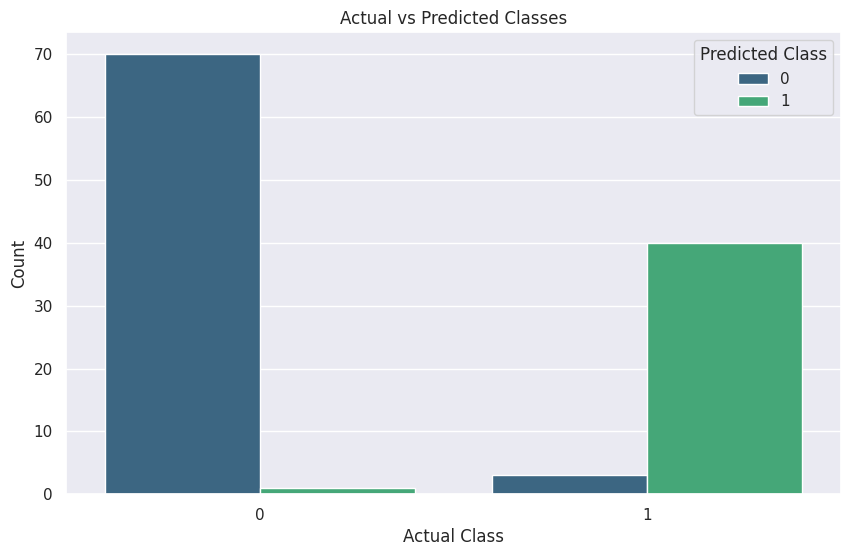

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred_knn = knn_model.predict(X_test)
print("Accuracy of KNN:", accuracy_score(y_test, y_pred_knn))

Accuracy of KNN: 0.9298245614035088


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



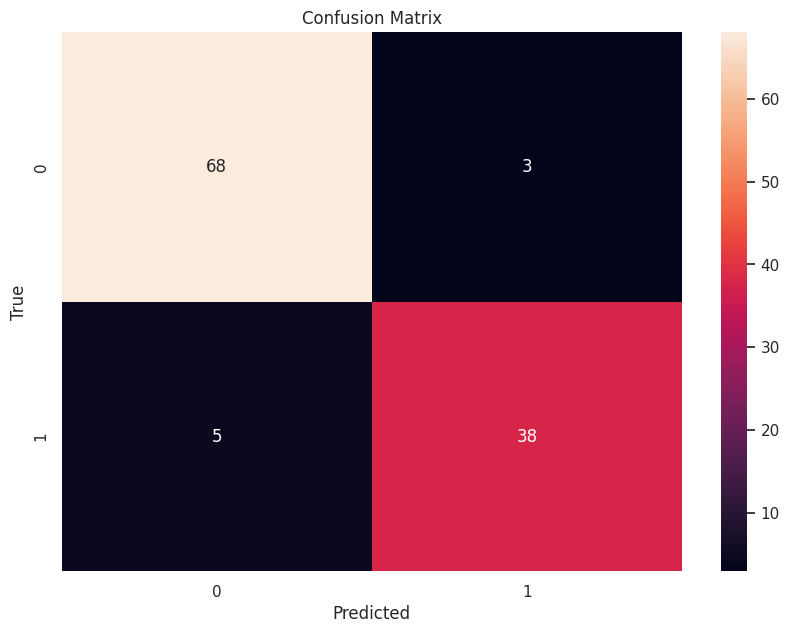

In [33]:
print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
esults_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


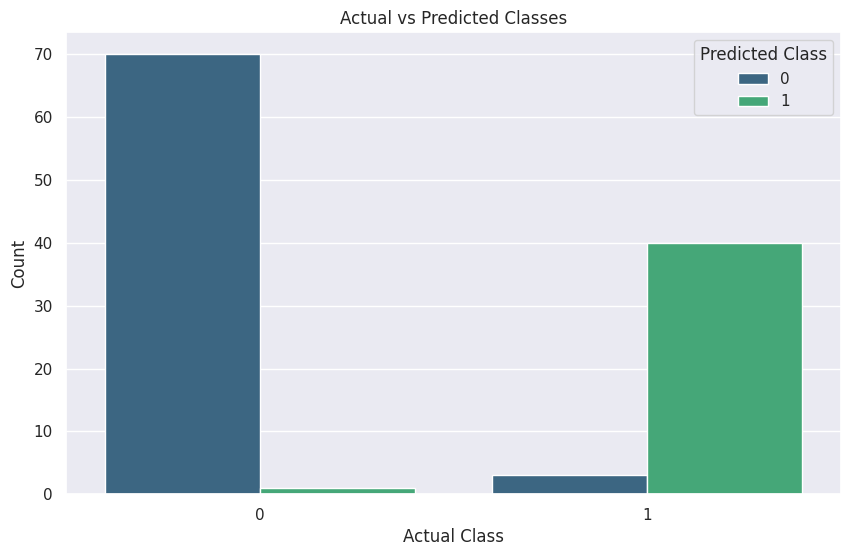

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [36]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [37]:
y_pred_svm = svm_model.predict(X_test)

print("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))

Accuracy of SVM: 0.9473684210526315


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



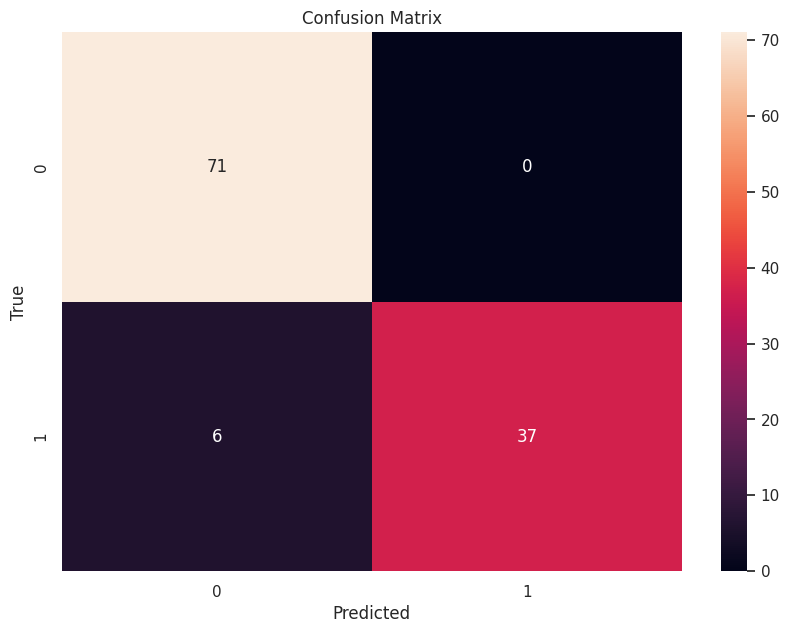

In [38]:
print(classification_report(y_test, y_pred_svm))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svm
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


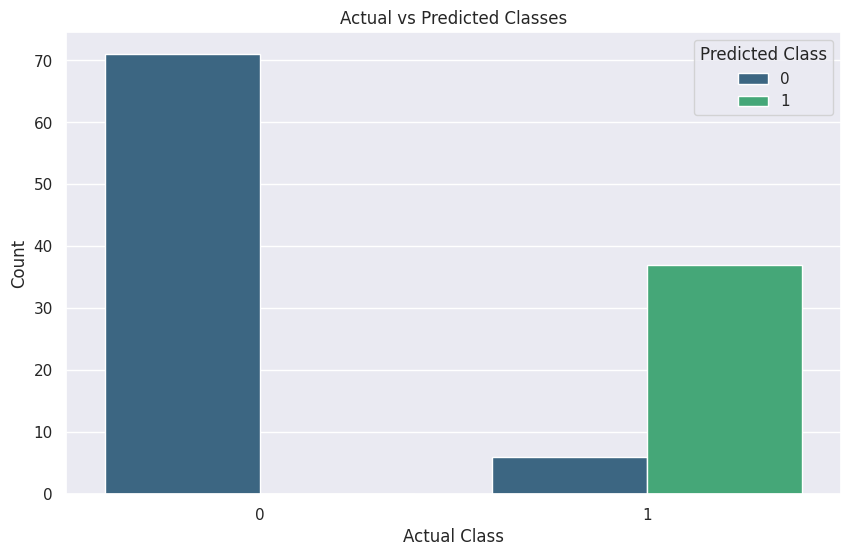

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [41]:
ada_model = AdaBoostClassifier(n_estimators=50)
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [42]:
y_pred_ada = ada_model.predict(X_test)

print("Accuracy of AdaBoost:", accuracy_score(y_test, y_pred_ada))

Accuracy of AdaBoost: 0.9736842105263158


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



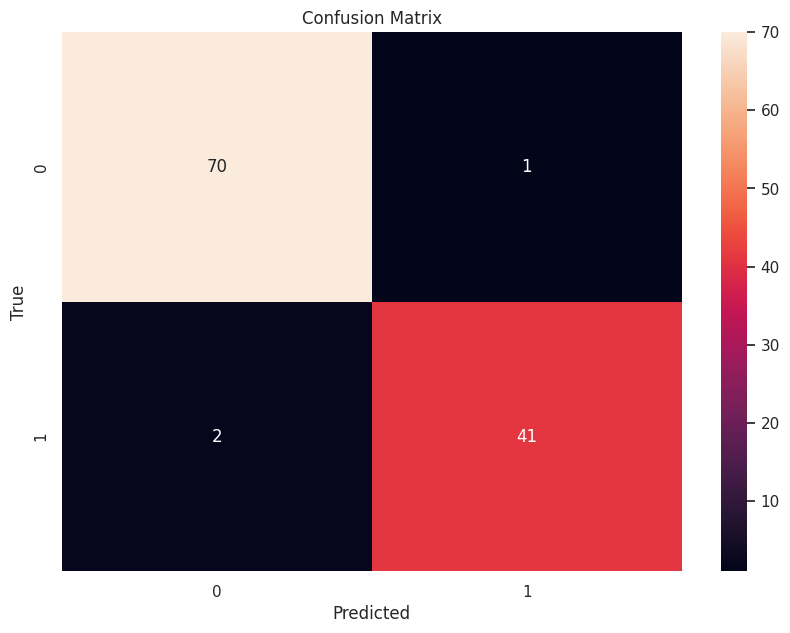

In [43]:
print(classification_report(y_test, y_pred_ada))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_ada
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


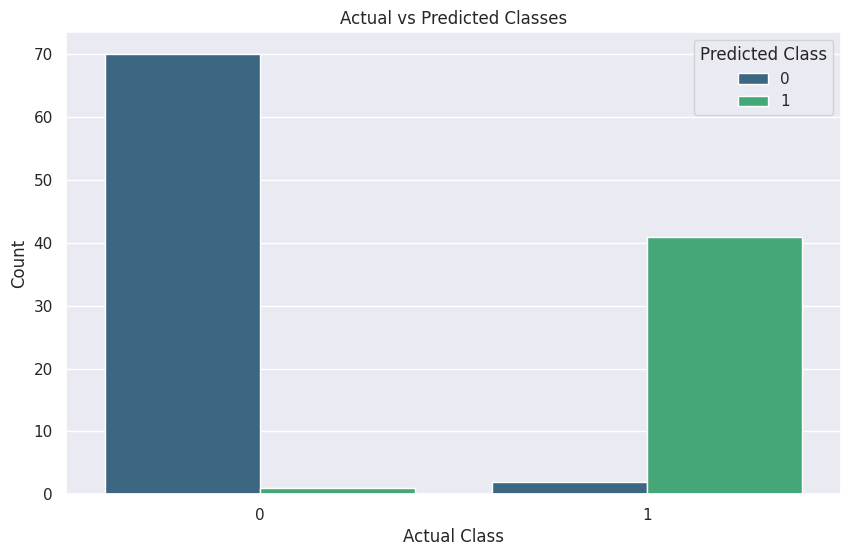

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [46]:
gb_model = GradientBoostingClassifier(n_estimators=50)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [47]:
y_pred_gb = gb_model.predict(X_test)

print("Accuracy of Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

Accuracy of Gradient Boosting: 0.956140350877193


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



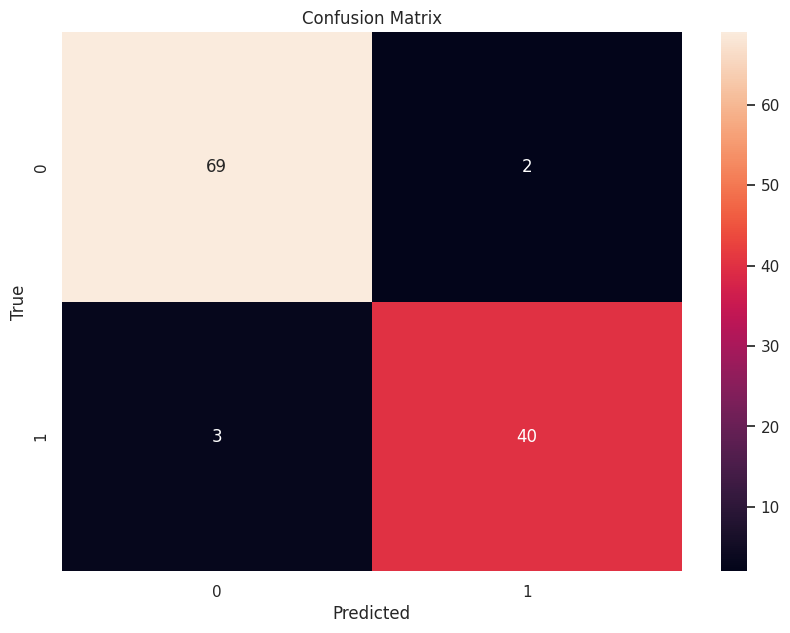

In [48]:
print(classification_report(y_test, y_pred_gb))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gb
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


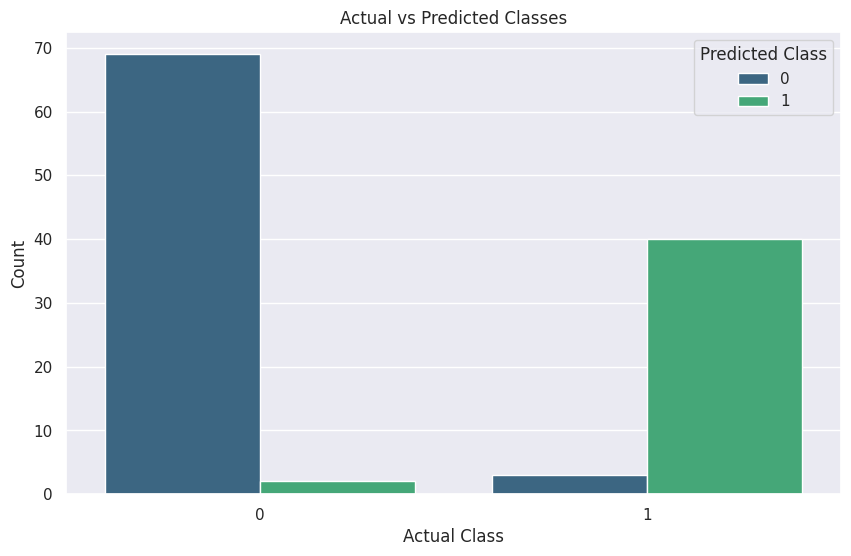

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [51]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred = xgb_model.predict(X_test)

print("Accuracy of XGBoost:", accuracy_score(y_test, y_pred))

Accuracy of XGBoost: 0.956140350877193


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



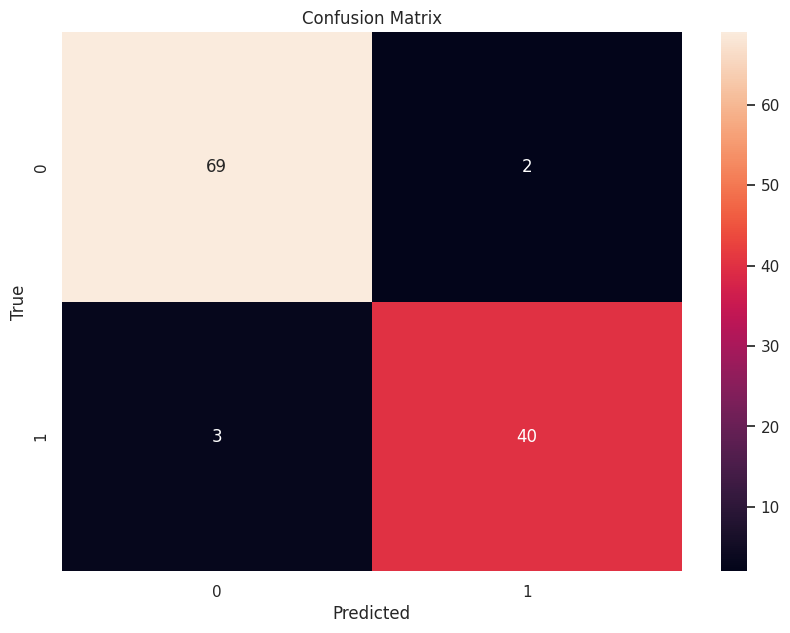

In [53]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


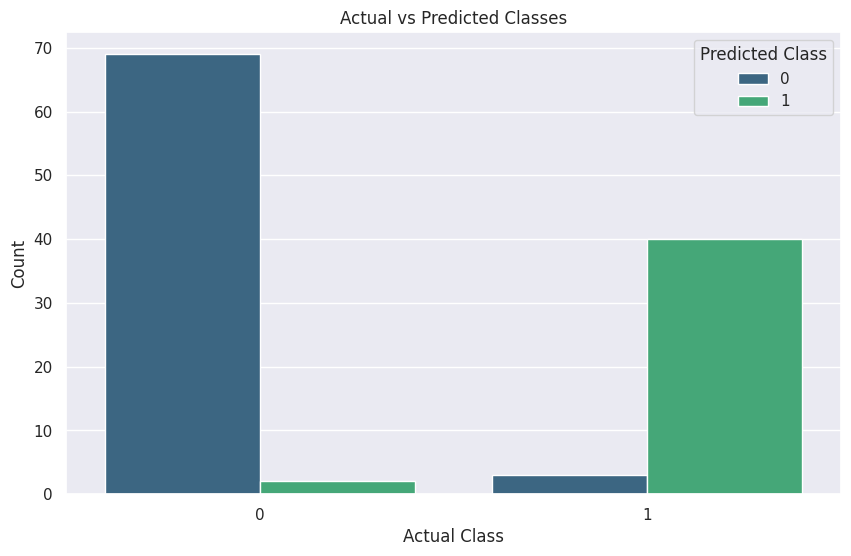

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [56]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)

In [57]:
y_pred = bagging_model.predict(X_test)

print("Accuracy of Bagging:", accuracy_score(y_test, y_pred))

Accuracy of Bagging: 0.956140350877193


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



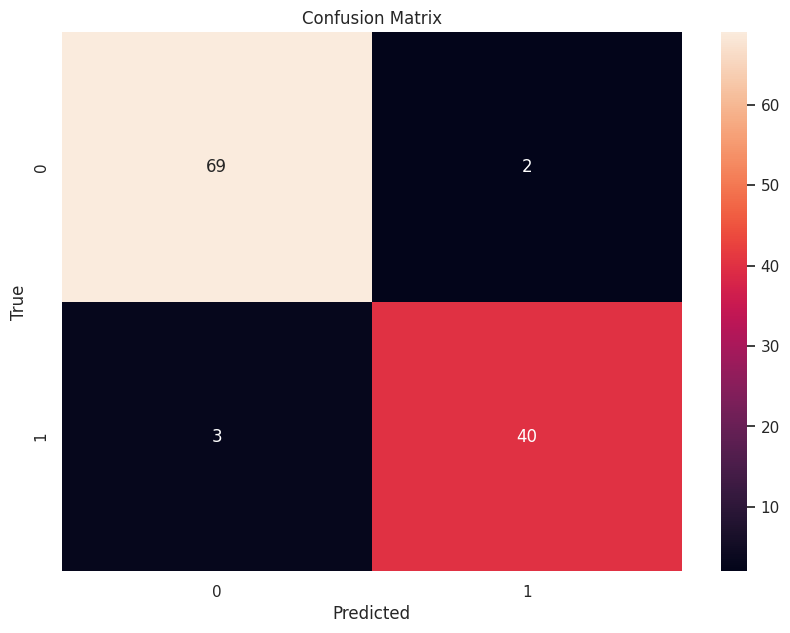

In [58]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          0
265       1          1

[114 rows x 2 columns]


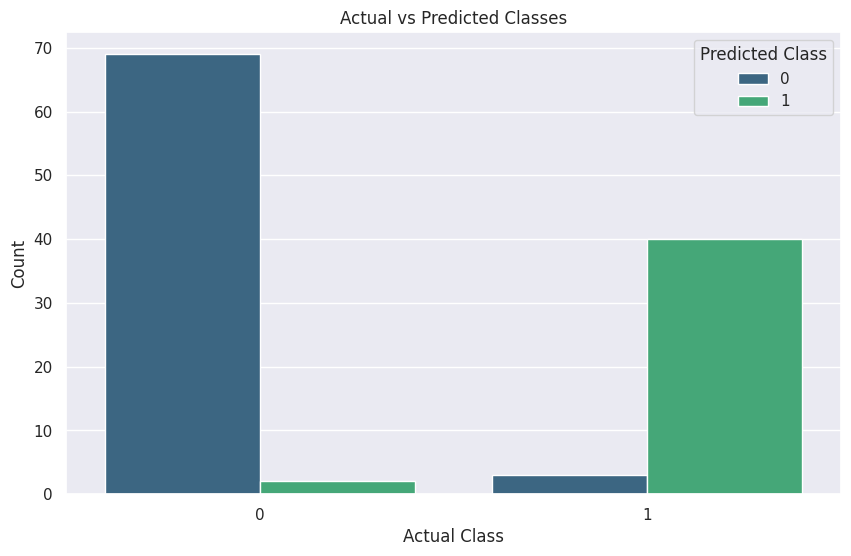

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()

In [61]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [62]:
y_pred = logistic_model.predict(X_test)

print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.956140350877193


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



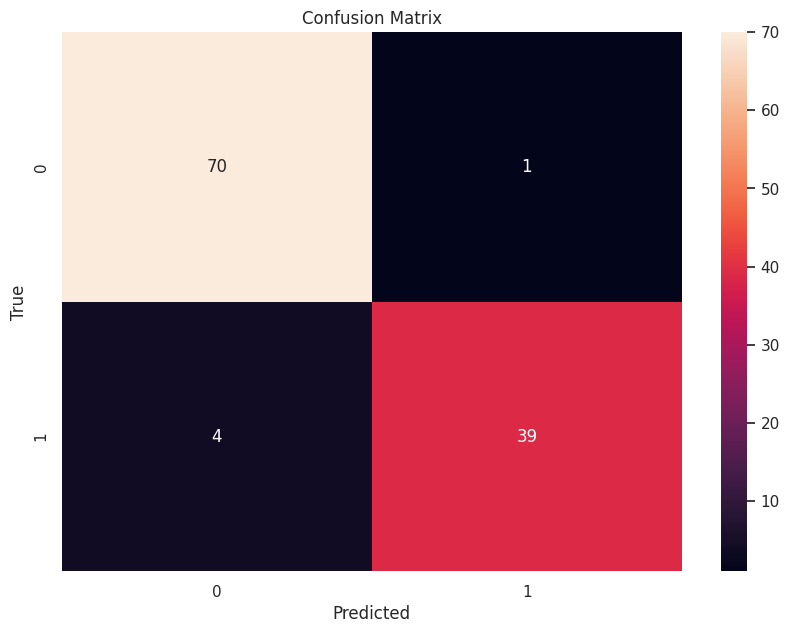

In [63]:
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [64]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df)

     Actual  Predicted
204       0          0
70        1          1
131       1          1
431       0          0
540       0          0
..      ...        ...
486       0          0
75        1          1
249       0          0
238       0          1
265       1          1

[114 rows x 2 columns]


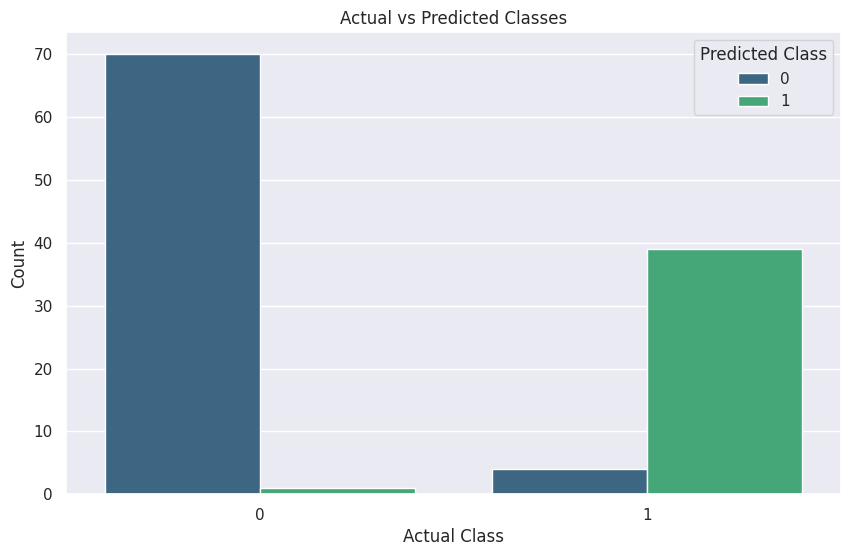

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.legend(title='Predicted Class', loc='upper right')
plt.show()



***Thank you for taking the time to review this analysis notebook. I hope it provides valuable insights into the breast-cancerdataset and aids in your understanding of data analysis techniques. Should you have any questions or require further assistance, please feel free to reach out***